# Exploratory Data Analysis

## US Bank Wages dataset

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read in data and convert column names to lowercase 
us_bank_wages = pd.read_csv("us_bank_wages/us_bank_wages.txt", sep="\t", index_col=0)
us_bank_wages.columns = us_bank_wages.columns.str.lower()

## Dataset Characteristics

***Column Names and descriptions***

* **SALARY**:  current yearly salary in dollar [\$]
* **EDUC**: education (number of finished years)
* **SALBEGIN**: yearly salary at employee's first position at same bank in dollars [\$]
* **GENDER**: gender variable (0 for females, 1 for males)
* **MINORITY**: minority variable (0 for non-minorities, 1 for minorities)
* **JOBCAT**: - job category (1 for administrative jobs, 2 for custodial jobs, 3 for management jobs)



**JOBCAT**
* *administrative*: broad range of different duties, including answering phones, speaking with clients, clerical work (including maintaining records and entering data)
* *custodial*: e.g.asset/investment manager
* *management*: e.g. branch manager

In [3]:
# Top 5 rows of dataset
us_bank_wages.head()

,salary,educ,salbegin,gender,minority,jobcat
0,57000,15,27000,1,0,3
1,40200,16,18750,1,0,1
2,21450,12,12000,0,0,1
3,21900,8,13200,0,0,1
4,45000,15,21000,1,0,1


In [4]:
# Bottom 5 rows of dataset
us_bank_wages.tail()

,salary,educ,salbegin,gender,minority,jobcat
469,26250,12,15750,1,1,1
470,26400,15,15750,1,1,1
471,39150,15,15750,1,0,1
472,21450,12,12750,0,0,1
473,29400,12,14250,0,0,1


In [5]:
# Index and rows/columns, data type and non-null values
us_bank_wages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 473
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   salary    474 non-null    int64
 1   educ      474 non-null    int64
 2   salbegin  474 non-null    int64
 3   gender    474 non-null    int64
 4   minority  474 non-null    int64
 5   jobcat    474 non-null    int64
dtypes: int64(6)
memory usage: 25.9 KB


In [6]:
# Overview of key statistical data
us_bank_wages.describe()

,salary,educ,salbegin,gender,minority,jobcat
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,34419.567511,13.491561,17016.086498,0.544304,0.219409,1.411392
std,17075.661465,2.884846,7870.638154,0.498559,0.414284,0.773201
min,15750.000000,8.000000,9000.000000,0.000000,0.000000,1.000000
25%,24000.000000,12.000000,12487.500000,0.000000,0.000000,1.000000
50%,28875.000000,12.000000,15000.000000,1.000000,0.000000,1.000000
75%,36937.500000,15.000000,17490.000000,1.000000,0.000000,1.000000
max,135000.000000,21.000000,79980.000000,1.000000,1.000000,3.000000


In [7]:
# No. of unique values for rows educ, gender, minority, jobcat
print(f'Unique values for educ column: {us_bank_wages.educ.nunique()}')
print(f'Unique values for gender column: {us_bank_wages.gender.nunique()}')
print(f'Unique values for minority column: {us_bank_wages.minority.nunique()}')
print(f'Unique values for jobcat column: {us_bank_wages.jobcat.nunique()}')

Unique values for educ column: 10
Unique values for gender column: 2
Unique values for minority column: 2
Unique values for jobcat column: 3


In [8]:
# Actual values for rows educ, gender, minority, jobcat
print(f'Values for educ: {us_bank_wages.educ.unique()}')
print(f'Values for gender: {us_bank_wages.gender.unique()}')
print(f'Values for minority: {us_bank_wages.minority.unique()}')
print(f'Vlues for jobcat: {us_bank_wages.jobcat.unique()}')

Values for educ: [15 16 12  8 19 17 18 14 20 21]
Values for gender: [1 0]
Values for minority: [0 1]
Vlues for jobcat: [3 1 2]


***NOTE:***
* educ = category
* educ and jobcat need to be converted to dummy variables

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'educ'}>],
       [<AxesSubplot:title={'center':'salbegin'}>,
        <AxesSubplot:title={'center':'gender'}>],
       [<AxesSubplot:title={'center':'minority'}>,
        <AxesSubplot:title={'center':'jobcat'}>]], dtype=object)

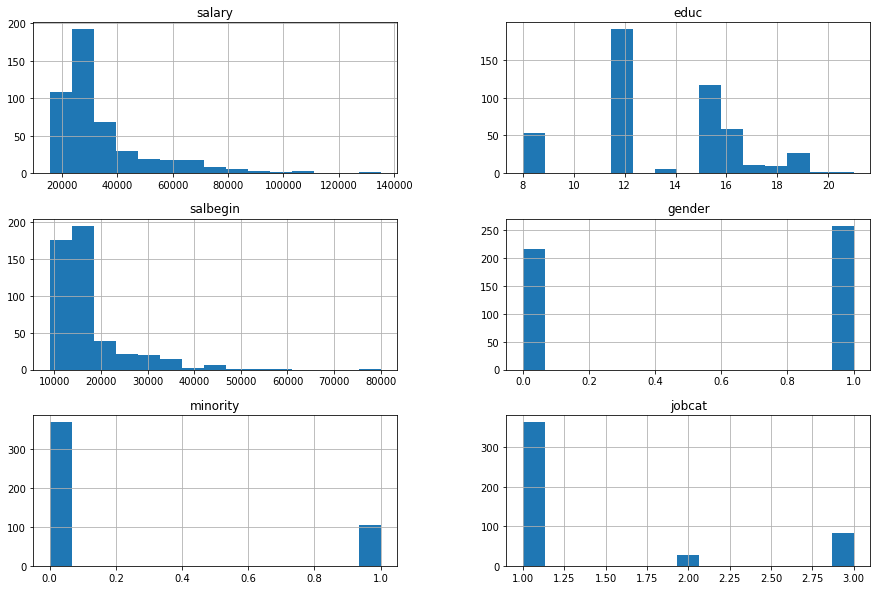

In [9]:
# Quick look at histogrammes to confirm our findings and double check if something was missed
us_bank_wages.hist(bins=15, figsize=(15, 10))

In [10]:
# Outlier check - compute absolute Z-score of each value in the column, relative to column mean and SD
us_bank_wages[(np.abs(stats.zscore(us_bank_wages)) < 3).all(axis=1)]
us_bank_wages.shape

(474, 6)

### Summary (a)

    * 6 columns, 474 instances
    * 4 categorical columns
    * all integers
    * no null values
    
    * salary: A) min 15750 Dollars, B) max 135000 Dollars, C) mean 34419
    * salbegin similar pattern to salary
    * high salaries -> right skewed -> convert salary and salbegin to log scale for regression

## Correlations

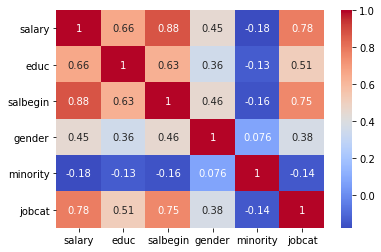

In [11]:
# Heatmap to give a quick overview
corr = us_bank_wages.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot= True);

### Summary (b)

FOR STARTING SALARY
* STRONG
    * Starting salary (salbegin) appears to have the strongest positive relationship with salary.
    * The job description (jobcategory) also shows a strong relationship with the starting salary.
* MEDIUM
    * Education also appears to correlate well with the starting salary.
* LOW
    * There are appears to be little to no correlation between gender/minority and starting salary.-> investigate further

FOR OTHER FEATURES
* Minority does not appear to correlate well with any parameter -> check how many minorities
* education appears to correlate somewhat with jobcat

In [12]:
# Count number of minorities in dataset
us_bank_wages['minority'].value_counts()

0    370
1    104
Name: minority, dtype: int64

**Note**: Number of minorities: 104 out of a total of 474 -> not too low

<AxesSubplot:xlabel='salary', ylabel='salbegin'>

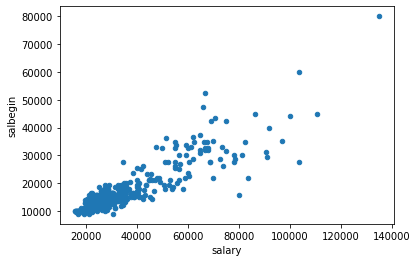

In [13]:
# Scatter plot for the continuous variables
us_bank_wages.plot.scatter(x='salary', y='salbegin')

### Summary (c)

- Strong relationship between current salary and starting salary for low wages.
- More variability for medium wages.
- Not enough data for high wages.
- CAUTION: As there is no information regarding the time-lapse between starting salary and current salary, this relationship can only be used qualitatively (not quantitatively) i.e. ***high earners stay high earners & salaries increases over time***.

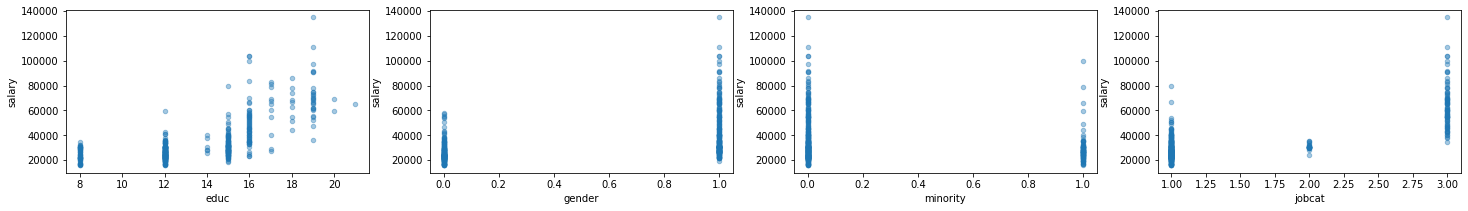

In [14]:
# Take a closer look at the categorical features side-by-side
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,3))

for xcol, ax in zip(['educ', 'gender', 'minority', 'jobcat'], axes):
    us_bank_wages.plot(kind='scatter', x=xcol, y='salary', ax=ax, alpha=0.4)

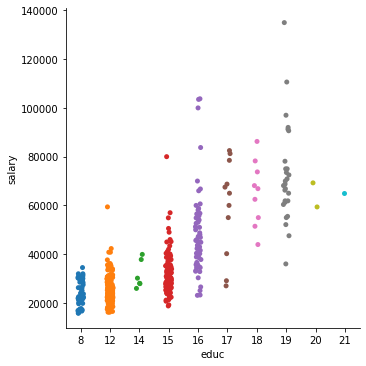

In [15]:
# Further investigate education
sns.catplot(x='educ', y="salary", data=us_bank_wages)

### Summary (d)

Relationship between salary and categorical variables is given, but requires further invstigation to check for cross interactions.

## Explore interaction effects

In [16]:
# Prepare dataframe, i.e.insert labels for catergorical values
us_bank_wages_2 = us_bank_wages.copy()
us_bank_wages_2['gender'].replace(0, 'Female',inplace=True)
us_bank_wages_2['gender'].replace(1, 'Male',inplace=True)
us_bank_wages_2['minority'].replace(0, 'Non-Minority',inplace=True)
us_bank_wages_2['minority'].replace(1, 'Minority',inplace=True)
us_bank_wages_2['jobcat'].replace(1, 'Adim',inplace=True)
us_bank_wages_2['jobcat'].replace(2, 'Custodial',inplace=True)
us_bank_wages_2['jobcat'].replace(3, 'Management',inplace=True)

In [17]:
# Group/bin education years according to education level, i.e. high school/training, BSc, MSc, PhD
us_bank_wages_3 = us_bank_wages_2.copy()
us_bank_wages_3['education'] = pd.cut(us_bank_wages_3['educ'], [0,8,16,17,19],
                              labels=['school/training', 'BSc', 'MSc', 'PhD'])
us_bank_wages_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 473
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   salary     474 non-null    int64   
 1   educ       474 non-null    int64   
 2   salbegin   474 non-null    int64   
 3   gender     474 non-null    object  
 4   minority   474 non-null    object  
 5   jobcat     474 non-null    object  
 6   education  471 non-null    category
dtypes: category(1), int64(3), object(3)
memory usage: 42.7+ KB


<span style="color:blue">Binning generated a couple of NaNs -> needs to be fixed</span>

### Part 1: Effect of Education and Jobtype

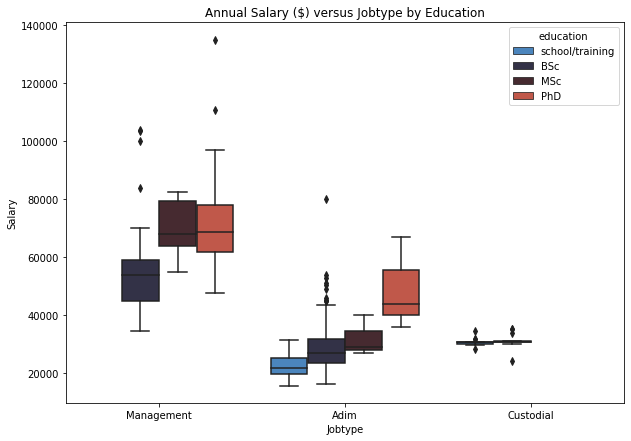

In [18]:
# Boxplot for salary versus jobtype by education
plt.figure(figsize=(10,7))
sns.boxplot(
    x='jobcat',
    y='salary',
    hue='education',
    data=us_bank_wages_3,palette='icefire'
).set(
    xlabel='Jobtype',
    ylabel='Salary'
)
plt.title('Annual Salary ($) versus Jobtype by Education');

### Part 2: Gender Differences

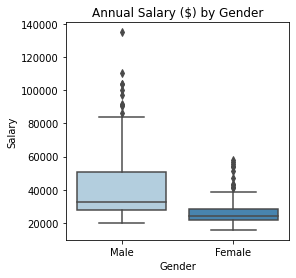

In [19]:
# Salary male versus female
plt.figure(figsize=(4,4))
sns.boxplot(
    x='gender',
    y='salary',
    data=us_bank_wages_3,palette='Blues'
).set(
    xlabel='Gender',
    ylabel='Salary'
)
plt.title('Annual Salary ($) by Gender');

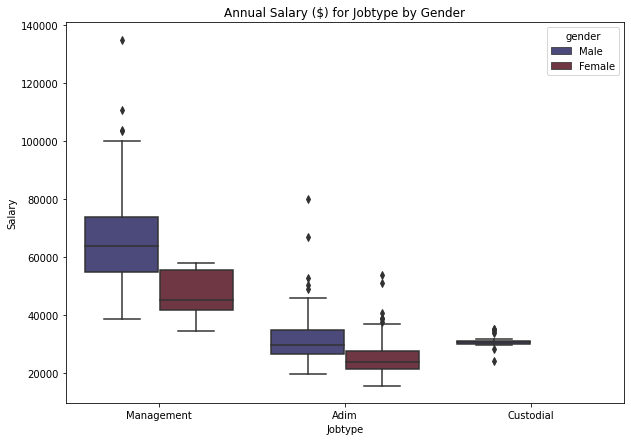

In [20]:
# Boxplot for salary versus jobtype by gender
plt.figure(figsize=(10,7))
sns.boxplot(
    x='jobcat',
    y='salary',
    hue='gender',
    data=us_bank_wages_3,palette='icefire'
).set(
    xlabel='Jobtype',
    ylabel='Salary'
)
plt.title('Annual Salary ($) for Jobtype by Gender');

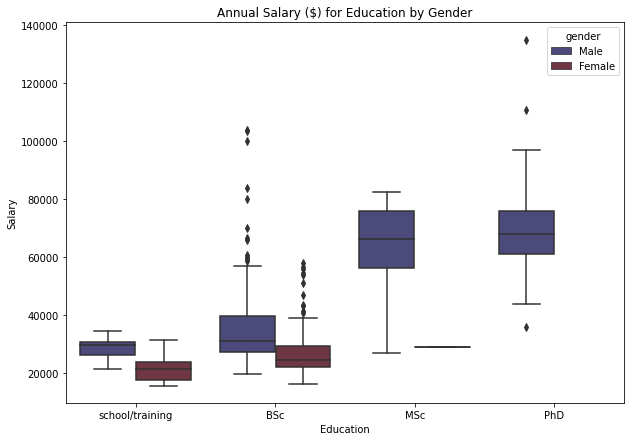

In [21]:
# Boxplot for salary versus education by gender
plt.figure(figsize=(10,7))
sns.boxplot(
    x='education',
    y='salary',
    hue='gender',
    data=us_bank_wages_3,palette='icefire'
).set(
    xlabel='Education',
    ylabel='Salary'
)
plt.title('Annual Salary ($) for Education by Gender');

### Part 3: (Non)-Minorities

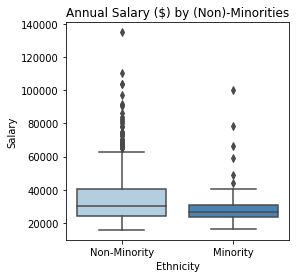

In [22]:
# Salary for (non)-minorities
plt.figure(figsize=(4,4))
sns.boxplot(
    x='minority',
    y='salary',
    data=us_bank_wages_3,palette='Blues'
).set(
    xlabel='Ethnicity',
    ylabel='Salary'
)
plt.title('Annual Salary ($) by (Non)-Minorities');

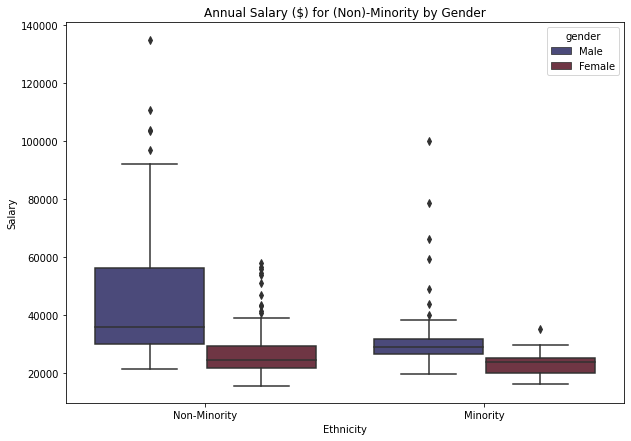

In [23]:
# Boxplot for salary versus minority by gender
plt.figure(figsize=(10,7))
sns.boxplot(
    x='minority',
    y='salary',
    hue='gender',
    data=us_bank_wages_3,palette='icefire'
).set(
    xlabel='Ethnicity',
    ylabel='Salary'
)
plt.title('Annual Salary ($) for (Non)-Minority by Gender');

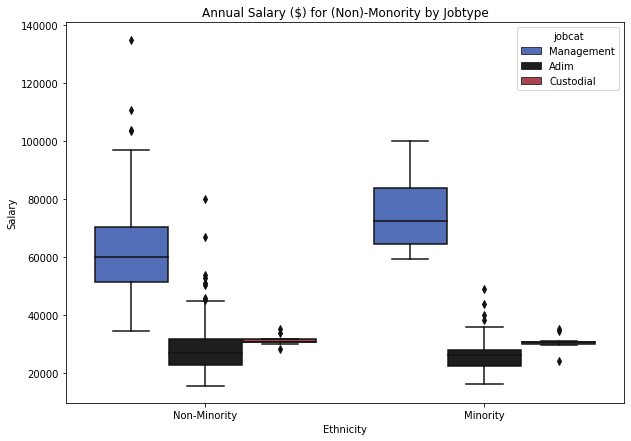

In [24]:
# Boxplot for salary versus minority by jobcat
plt.figure(figsize=(10,7))
sns.boxplot(
    x='minority',
    y='salary',
    hue='jobcat',
    data=us_bank_wages_3,palette='icefire'
).set(
    xlabel='Ethnicity',
    ylabel='Salary'
)
plt.title('Annual Salary ($) for (Non)-Monority by Jobtype');

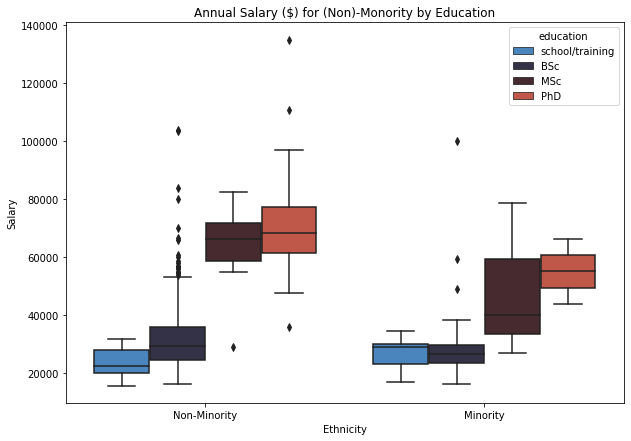

In [25]:
# Boxplot for salary versus minority by education
plt.figure(figsize=(10,7))
sns.boxplot(
    x='minority',
    y='salary',
    hue='education',
    data=us_bank_wages_3,palette='icefire'
).set(
    xlabel='Ethnicity',
    ylabel='Salary'
)
plt.title('Annual Salary ($) for (Non)-Monority by Education');

### Conclusion:

#### Part 1:
* A clear positive relationship between education <-> jobtype <-> salary

#### Part 2:
* A clear positive relationship between gender <-> salary, influenced by the positive relationships between gender <-> education and gender <-> jobtype, resulting in lower net salary for women

#### Part 3:
* A divergent relationship between minority <-> salary
    * Trend towards lower net salary for women seen for minorities and non-minorities
    * Difference between salaries of non-minorities and minorities increases with increasing education
    * Admin positions: minorities earn less
    * Management positions: reverse, i.e. they earcn more than non-minorities

#### Note
Custodians appear to be a special type of employee, as their salary has less variations and they are restricted to male employees of a specific education level

## Addendum

### Salary mean, min/max & count values per feature

In [26]:
# Drop NaN rows for education evaluations
us_bank_wages_4 = us_bank_wages_3.copy()
us_bank_wages_4.dropna(subset = ['education'], inplace=True)

In [27]:
# Salary mean, min/max & count per education
for i in us_bank_wages_4.education.unique():
        print(i, us_bank_wages_4[(us_bank_wages_4['education'] == i)].salary.mean())
        print(i, us_bank_wages_4[(us_bank_wages_4['education'] == i)].salary.min())
        print(i, us_bank_wages_4[(us_bank_wages_4['education'] == i)].salary.max())
        print(i, us_bank_wages_4[(us_bank_wages_4['education'] == i)].education.count())

BSc 31345.283018867925
BSc 16200
BSc 103750
BSc 371
school/training 24399.056603773584
school/training 15750
school/training 34500
school/training 53
PhD 70672.22222222222
PhD 36000
PhD 135000
PhD 36
MSc 59527.27272727273
MSc 27000
MSc 82500
MSc 11


In [28]:
# Salary mean, min/max & count per jobcat
for i in us_bank_wages_3.jobcat.unique():
        print(i, us_bank_wages_3[(us_bank_wages_3['jobcat'] == i)].salary.mean())
        print(i, us_bank_wages_3[(us_bank_wages_3['jobcat'] == i)].salary.min())
        print(i, us_bank_wages_3[(us_bank_wages_3['jobcat'] == i)].salary.max())
        print(i, us_bank_wages_3[(us_bank_wages_3['jobcat'] == i)].education.count())

Management 63977.79761904762
Management 34410
Management 135000
Management 81
Adim 27838.53994490358
Adim 15750
Adim 80000
Adim 363
Custodial 30938.88888888889
Custodial 24300
Custodial 35250
Custodial 27


In [29]:
# Salary mean, min/max & count per gender
for i in us_bank_wages_3.gender.unique():
        print(i, us_bank_wages_3[(us_bank_wages_3['gender'] == i)].salary.mean())
        print(i, us_bank_wages_3[(us_bank_wages_3['gender'] == i)].salary.min())
        print(i, us_bank_wages_3[(us_bank_wages_3['gender'] == i)].salary.max())
        print(i, us_bank_wages_3[(us_bank_wages_3['gender'] == i)].education.count())

Male 41441.782945736435
Male 19650
Male 135000
Male 255
Female 26031.921296296296
Female 15750
Female 58125
Female 216


In [30]:
# Salary mean, min/max & count per minority
for i in us_bank_wages_3.minority.unique():
        print(i, us_bank_wages_3[(us_bank_wages_3['minority'] == i)].salary.mean())
        print(i, us_bank_wages_3[(us_bank_wages_3['minority'] == i)].salary.min())
        print(i, us_bank_wages_3[(us_bank_wages_3['minority'] == i)].salary.max())
        print(i, us_bank_wages_3[(us_bank_wages_3['minority'] == i)].education.count())

Non-Minority 36023.31081081081
Non-Minority 15750
Non-Minority 135000
Non-Minority 367
Minority 28713.94230769231
Minority 16350
Minority 100000
Minority 104
